In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [49]:
df44 = pd.read_csv("/Users/branly/Desktop/Python Project/Test3.csv")

aggregate = {
    'Category_Name': list,
    'Sales': 'last',
    'Order_Id': 'last',
    'Order_Profit_Per_Order': 'last',
    'Customer_Segment': 'last',
    


}


grouped_df = df44.groupby('column1').agg(aggregate).reset_index()


print(grouped_df['Sales'].sum())

36784735.01305771


In [31]:
dfhome = pd.read_csv("/Users/branly/Desktop/Python Project/HomeSales.csv")

aggregatehome = {
    'Category_Name': list,
    'Sales': 'last',
    'Order_Id': 'last',
    'Order_Profit_Per_Order': 'last',
    'Customer_Segment': 'last',
    


}

home_df = dfhome.groupby('column1').agg(aggregatehome).reset_index()

home_df.head()

,column1,Category_Name,Sales,Order_Id,Order_Profit_Per_Order,Customer_Segment
0,3,[Sporting Goods],327.75,75937,22.860001,Home Office
1,6,[Sporting Goods],327.75,75934,95.180000,Home Office
2,41,[Sporting Goods],327.75,75899,135.690002,Home Office
3,42,[Sporting Goods],327.75,75898,132.669998,Home Office
4,43,[Sporting Goods],327.75,75897,119.760002,Home Office


/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/1647169722.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values,palette="viridis")


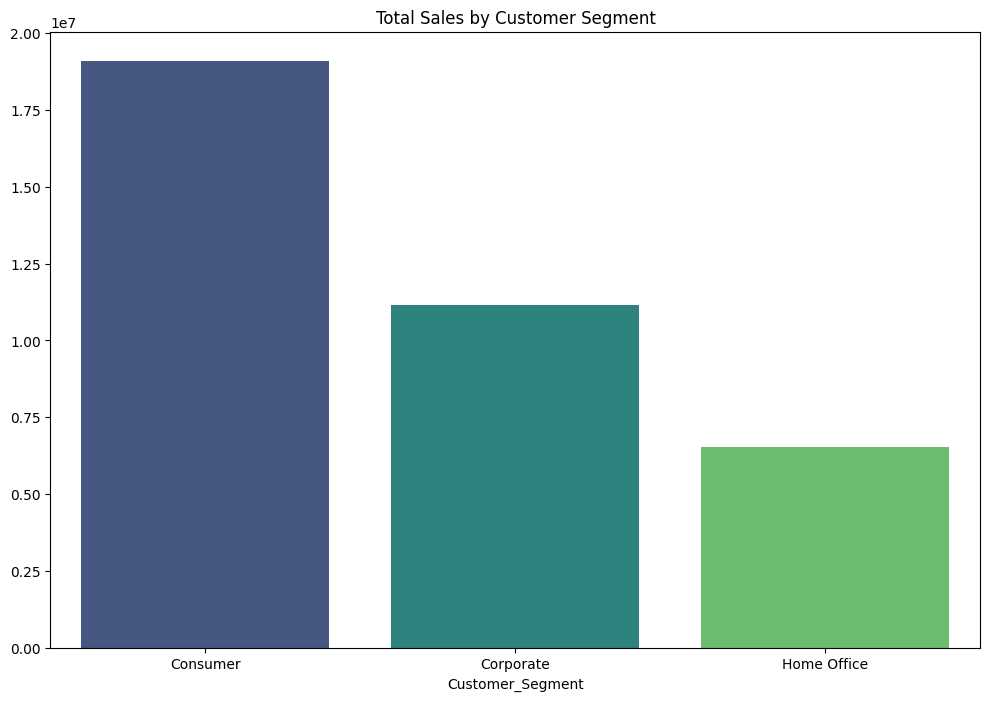

TypeError: 'Series' object is not callable

In [32]:
df = pd.read_csv("/Users/branly/Desktop/Python Project/Salesv2.csv")
df1 = pd.read_csv("/Users/branly/Desktop/Python Project/Marketv3.csv")
df22 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderID.csv")

segment_sales = df.groupby('Customer_Segment')['Sales'].sum().sort_values(ascending=False)

#category_sales = df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)

location_sales = df.groupby(['Order_Country', 'Order_State', 'Order_City'])['Sales'].sum().sort_values(ascending=False)

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)
monthly_sales = df.resample('M')['Sales'].sum()

plt.figure(figsize=(12, 8))
sns.barplot(x=segment_sales.index, y=segment_sales.values,palette="viridis")
plt.title('Total Sales by Customer Segment')
plt.show()

]

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/3191035944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


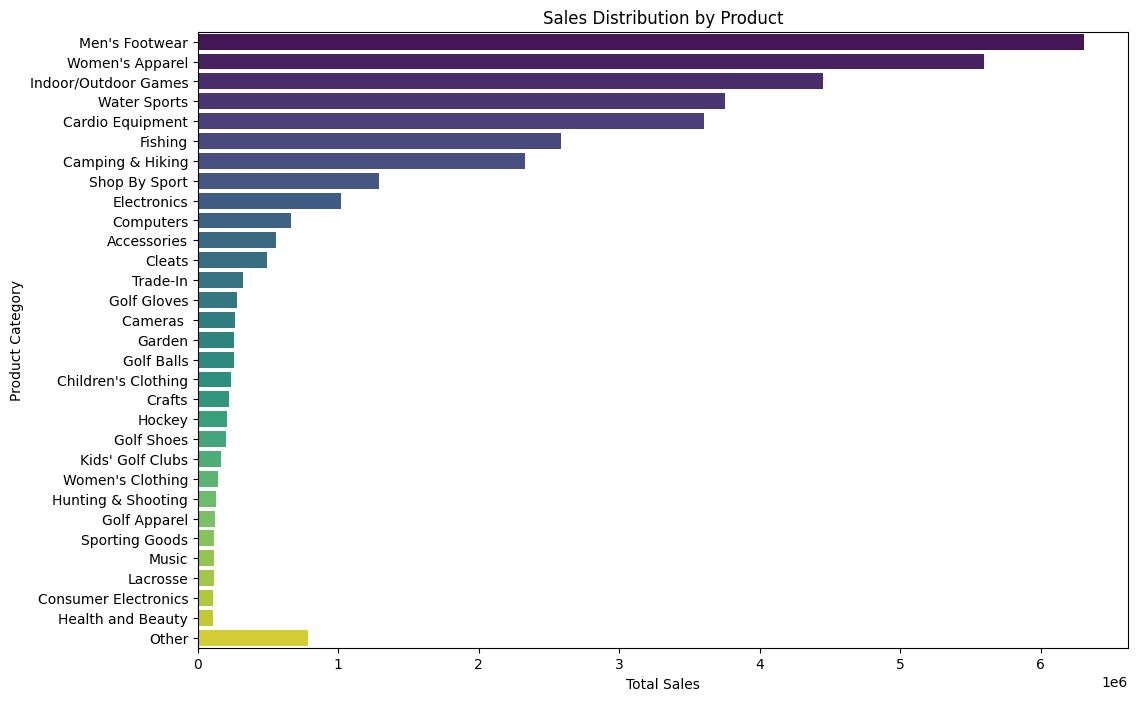

In [ ]:
grouped_df['Category_Name'] = grouped_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)
product_sales = grouped_df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)

threshold = 100000  
small_values = product_sales[product_sales < threshold]
product_sales = product_sales[product_sales >= threshold]
product_sales['Other'] = small_values.sum()


plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Sales Distribution by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

In [48]:
home_df.head()

,column1,Category_Name,Sales,Order_Id,Order_Profit_Per_Order,Customer_Segment
0,3,[Sporting Goods],327.75,75937,22.860001,Home Office
1,6,[Sporting Goods],327.75,75934,95.180000,Home Office
2,41,[Sporting Goods],327.75,75899,135.690002,Home Office
3,42,[Sporting Goods],327.75,75898,132.669998,Home Office
4,43,[Sporting Goods],327.75,75897,119.760002,Home Office


/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/3207235311.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profitability.index, y=category_profitability.values, palette="viridis")
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/3207235311.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profitability.index, y=segment_profitability.values, palette="viridis")


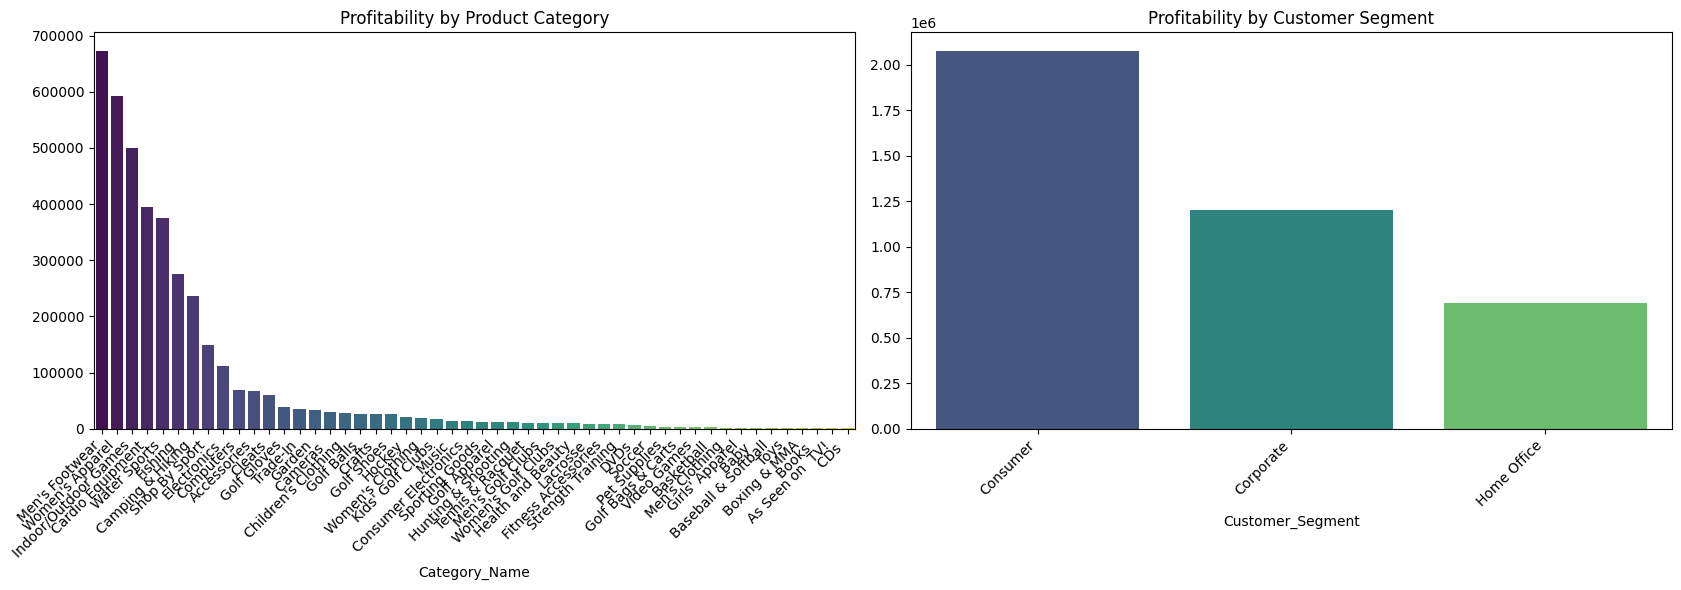

In [ ]:
grouped_df['Category_Name'] = grouped_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)

category_profitability = grouped_df.groupby('Category_Name')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)
segment_profitability = df.groupby('Customer_Segment')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)

plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=category_profitability.index, y=category_profitability.values, palette="viridis")
plt.title('Profitability by Product Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_profitability.index, y=segment_profitability.values, palette="viridis")
plt.title('Profitability by Customer Segment')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/1244286762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_pivot.index, y=order_status_pivot['Count'], palette='viridis')


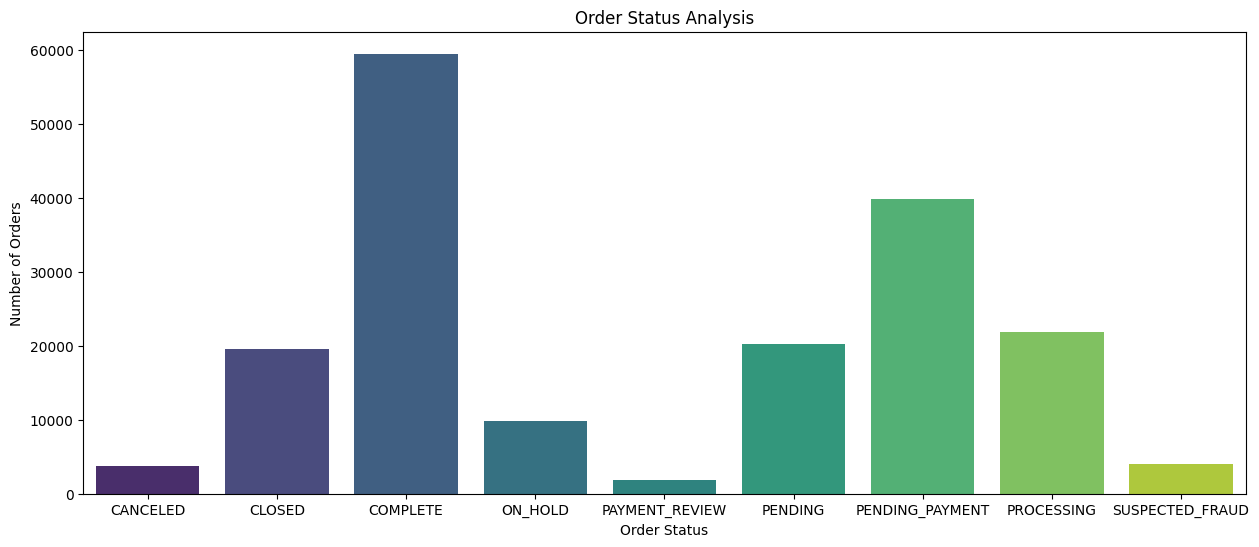

In [ ]:
order_status_counts = df['Order_Status'].value_counts()

order_status_df = pd.DataFrame({'Order_Status': order_status_counts.index, 'Count': order_status_counts.values})

order_status_pivot = order_status_df.pivot_table(index='Order_Status', values='Count', aggfunc='sum')

plt.figure(figsize=(15, 6))
sns.barplot(x=order_status_pivot.index, y=order_status_pivot['Count'], palette='viridis')
plt.title('Order Status Analysis')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()

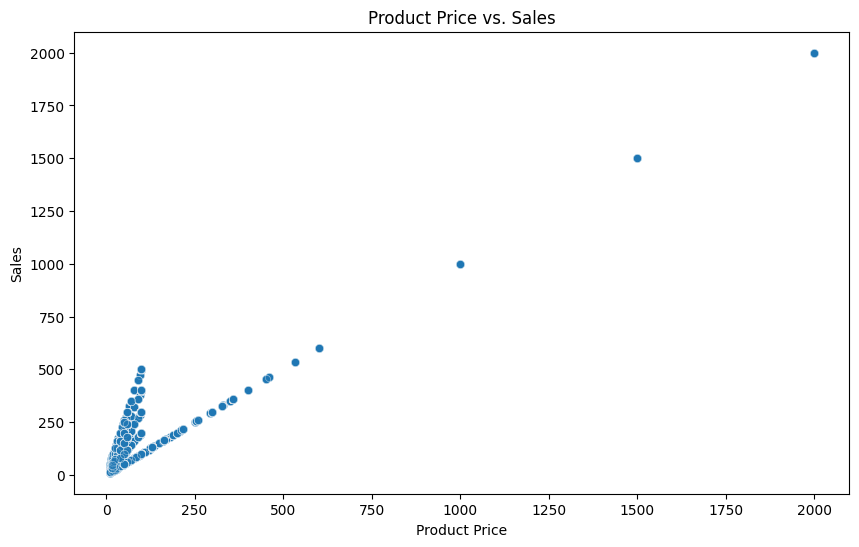

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/2865376836.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order_Item_Product_Price', y='Sales', data=df1, ci=None)


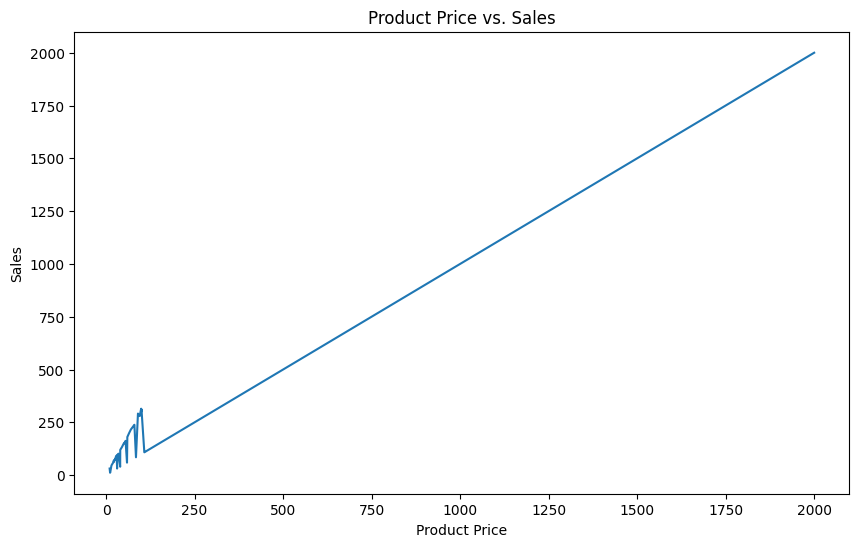

In [ ]:
df4 = pd.read_csv("/Users/branly/Desktop/Python Project/Price:sales.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Item_Product_Price', y='Sales', data=df1, alpha=0.5)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Item_Product_Price', y='Sales', data=df1, ci=None)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()

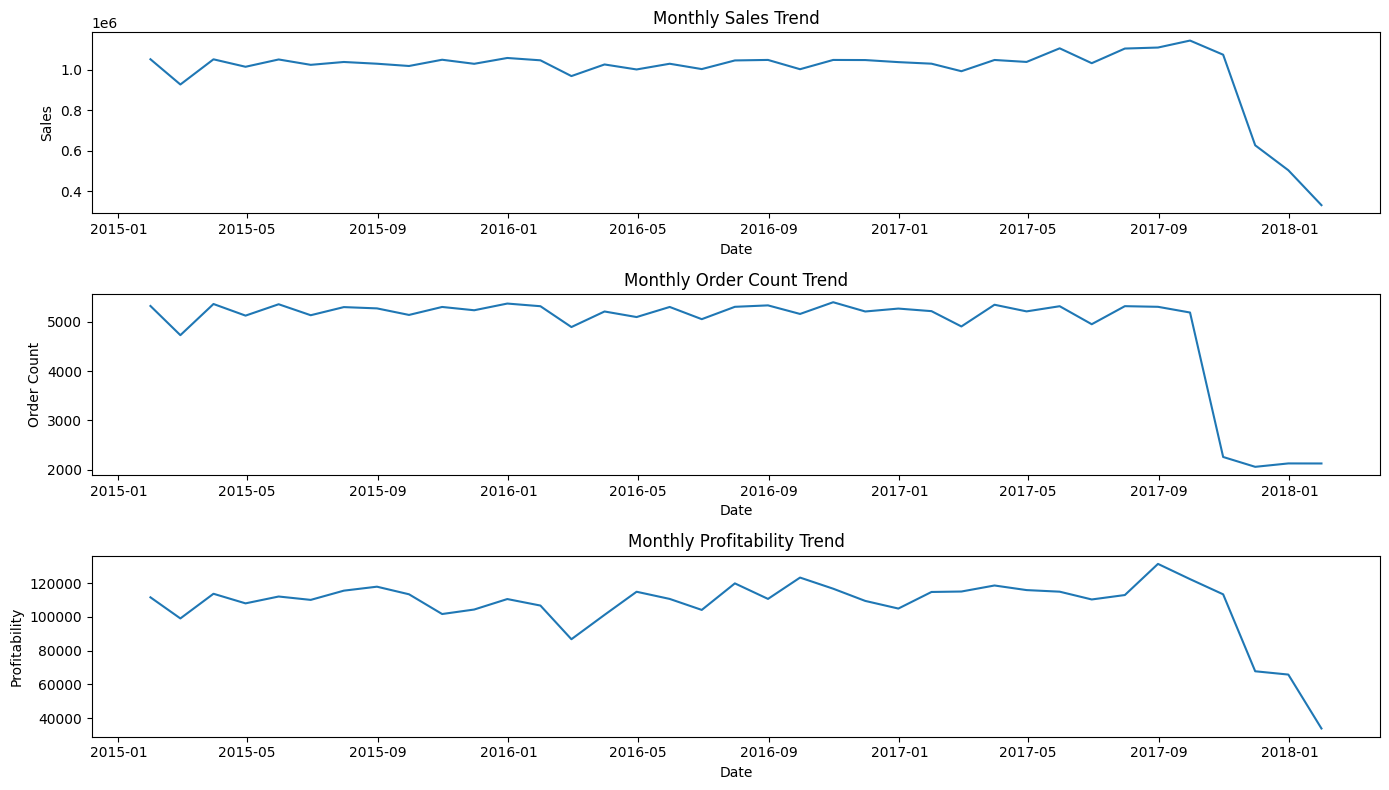

In [ ]:
df5 = pd.read_csv("/Users/branly/Desktop/Python Project/TSer.csv")

df22['OrderDate'] = pd.to_datetime(df22['OrderDate'])


df22.set_index('OrderDate', inplace=True)


monthly_data = df22.resample('M').agg({
    'Sales': 'sum',
    'Order_Id': 'count',  
    'Order_Profit_Per_Order': 'sum'  
})


plt.figure(figsize=(14, 8))

# Sales trend
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# Order count trend
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Order_Id')
plt.title('Monthly Order Count Trend')
plt.xlabel('Date')
plt.ylabel('Order Count')

# Profitability trend
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Order_Profit_Per_Order')
plt.title('Monthly Profitability Trend')
plt.xlabel('Date')
plt.ylabel('Profitability')

plt.tight_layout()
plt.show()

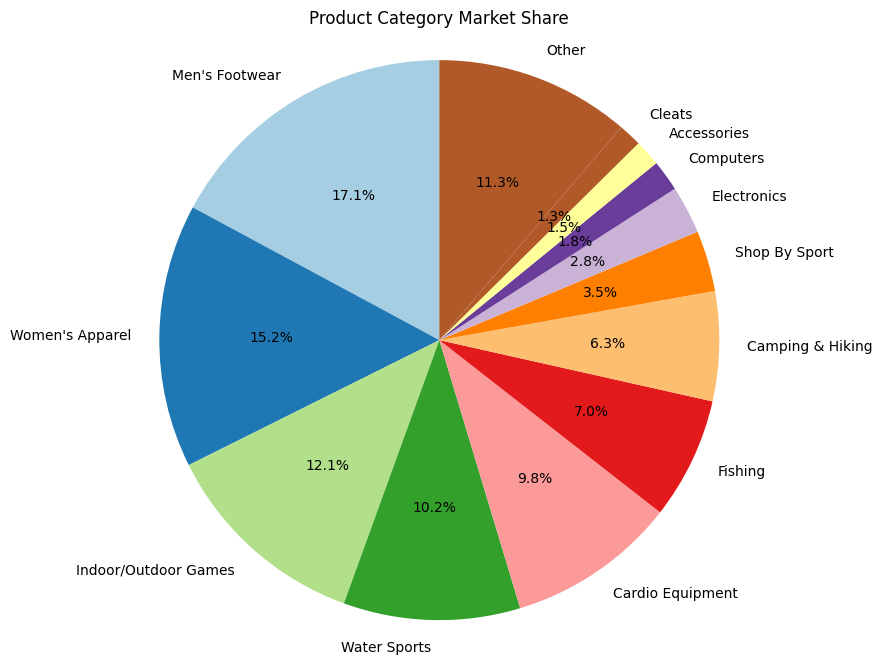

In [ ]:
grouped_df['Category_Name'] = grouped_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)

category_sales = grouped_df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)


market_share = category_sales / category_sales.sum()

threshold = 0.01  # 1.0%
filtered_categories = market_share[market_share >= threshold].index
other_sales = category_sales[~category_sales.index.isin(filtered_categories)].sum()
new_category_sales = pd.concat([category_sales[filtered_categories], pd.Series({'Other': other_sales})])
new_market_share = new_category_sales / new_category_sales.sum()

plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(new_category_sales)))

plt.pie(new_market_share, labels=new_market_share.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Product Category Market Share')
plt.axis('equal')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/3572158274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


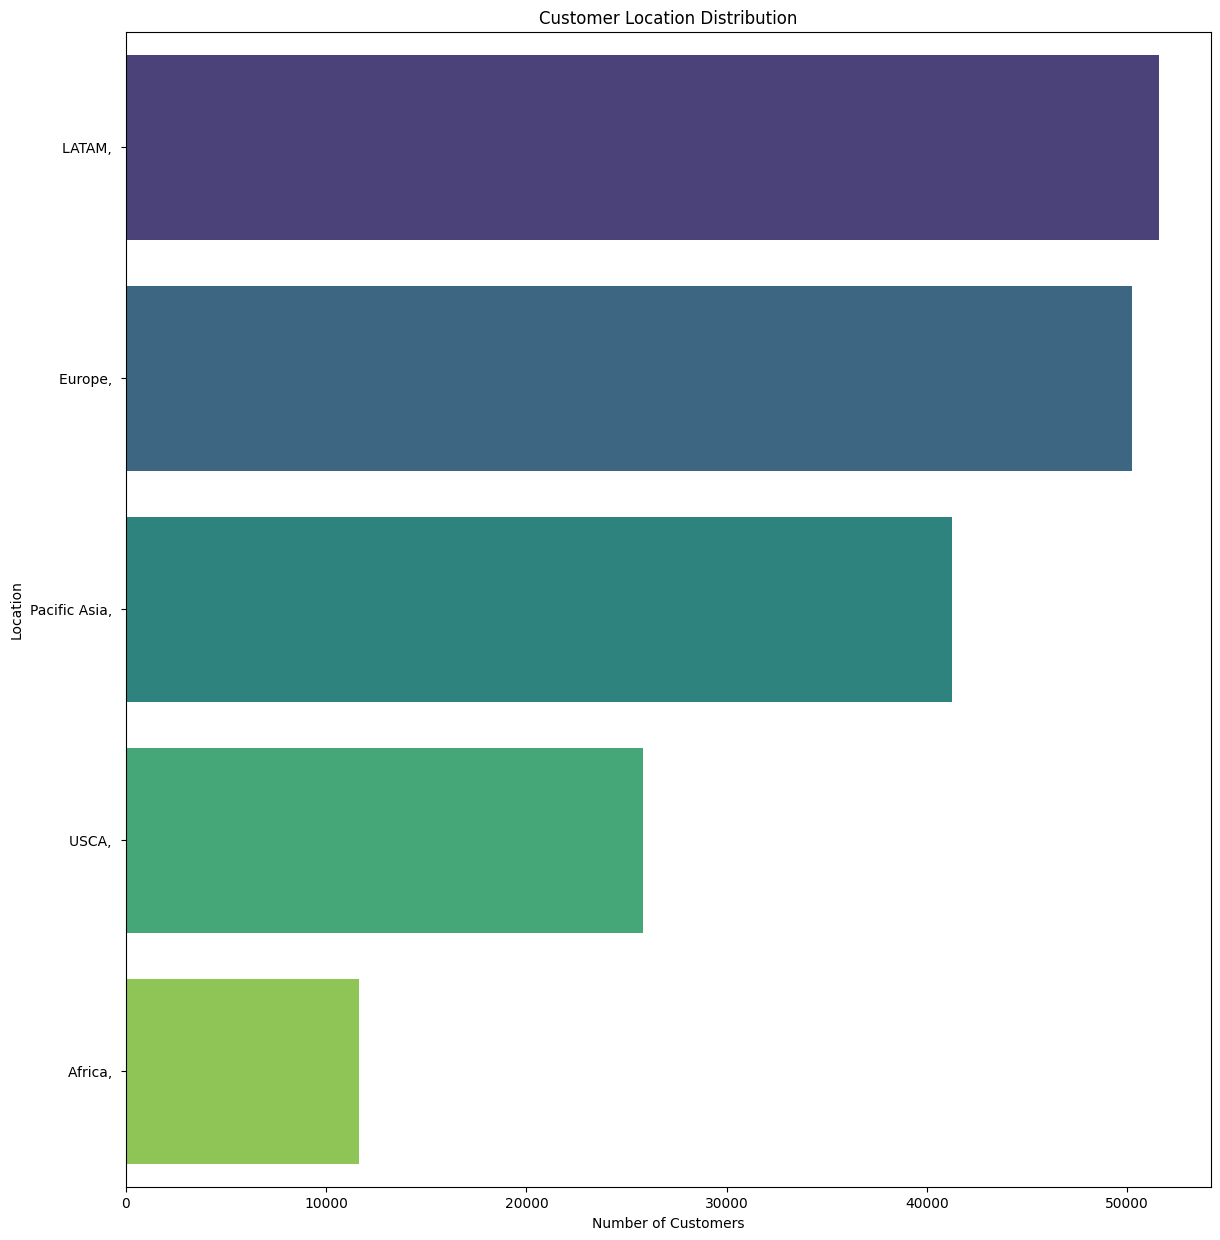

In [ ]:

df6 = pd.read_csv("/Users/branly/Desktop/Python Project/AOV2.csv")

df1['Location'] = df1['Market'] + ', ' #+ df['Order_State'] + ', ' #+ df['Order_City']


location_counts = df1['Location'].value_counts()

# Plotting
plt.figure(figsize=(14, 15))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Customer Location Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.show()


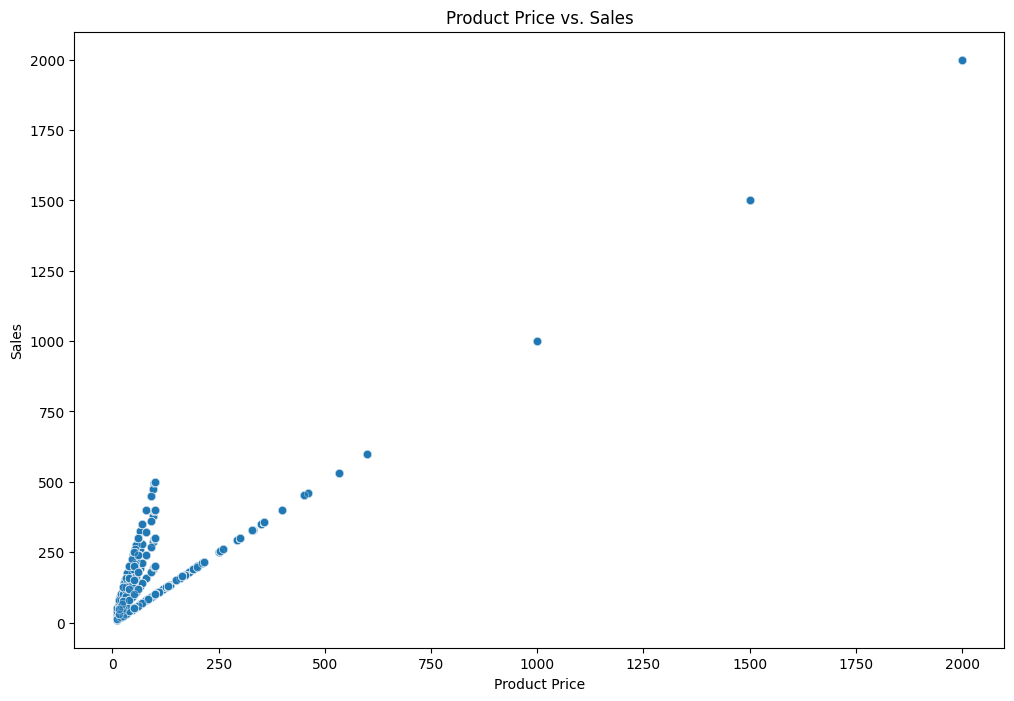

In [ ]:
df6 = pd.read_csv("/Users/branly/Desktop/Python Project/AOV2.csv")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Order_Item_Product_Price', y='Sales', data=df1, alpha=0.5)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/1380160744.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sales_by_price = df1.groupby(price_bins)['Sales'].mean()


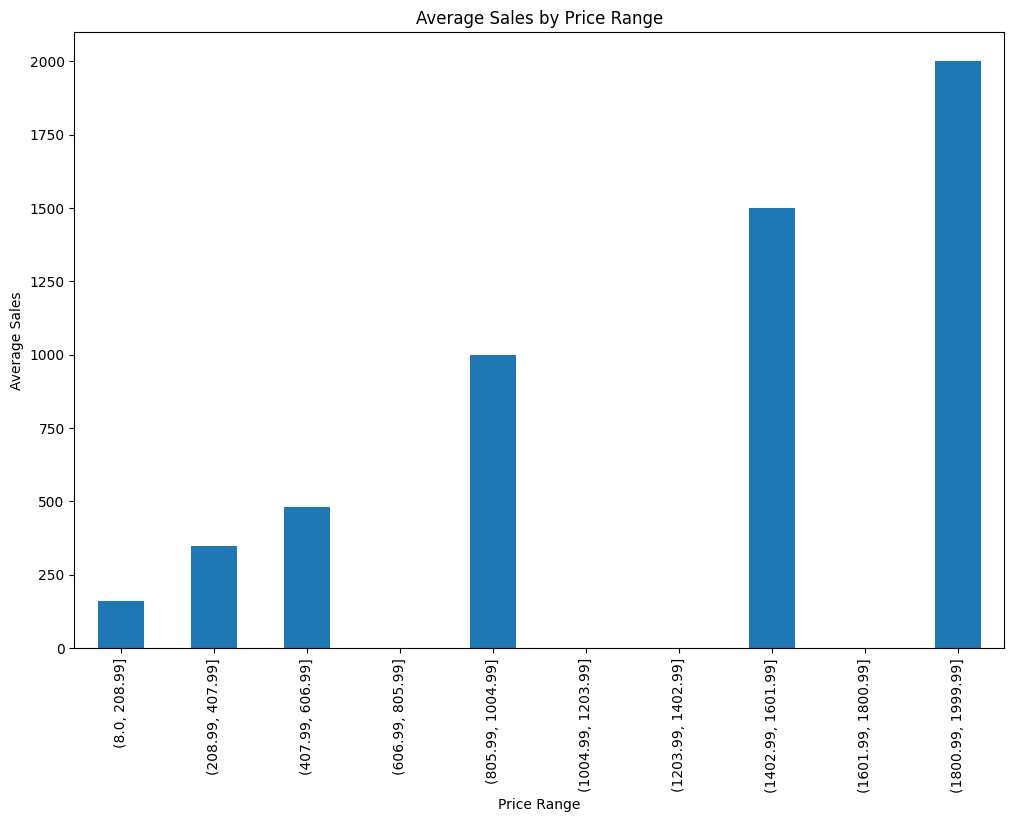

In [ ]:
# Create price bins
price_bins = pd.cut(df1['Order_Item_Product_Price'], bins=10)

# Calculate average sales for each price bin
average_sales_by_price = df1.groupby(price_bins)['Sales'].mean()

# Bar plot for average sales by price range
plt.figure(figsize=(12, 8))
average_sales_by_price.plot(kind='bar')
plt.title('Average Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Sales')
plt.show()


/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/1892088956.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_aov.index, y=segment_aov.values, palette='viridis')


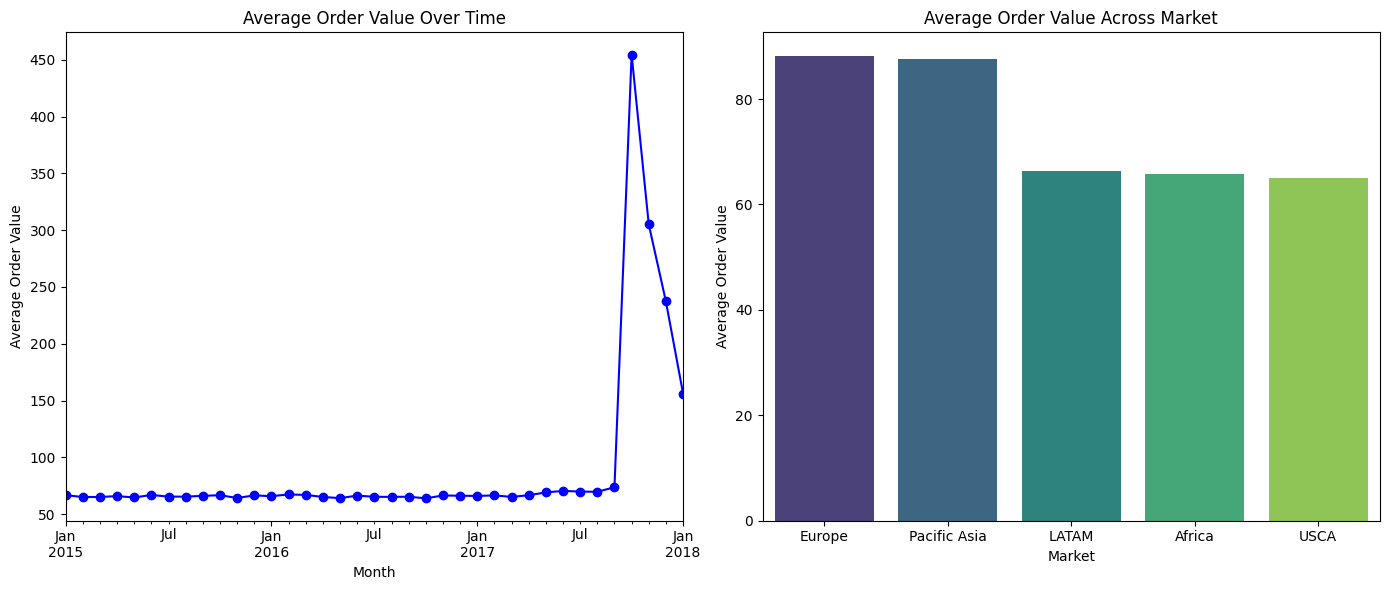

In [ ]:


df23 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderID.csv")

df23['OrderDate'] = pd.to_datetime(df23['OrderDate'])


df23['AOV'] = df23['Sales'] / df23.groupby('Order_Id')['Order_Id'].transform('count')


monthly_aov = df23.resample('M', on='OrderDate')['AOV'].mean()


segment_aov = df23.groupby('Market')['AOV'].mean().sort_values(ascending=False)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
monthly_aov.plot(marker='o', linestyle='-', color='b')
plt.title('Average Order Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Value')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_aov.index, y=segment_aov.values, palette='viridis')
plt.title('Average Order Value Across Market')
plt.xlabel('Market')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()


In [ ]:
column_sum = df['Sales'].sum()
print("Sum of 'Column2':", column_sum)
print(product_sales)

Sum of 'Column2': 36784735.01305771
Category_Name
Men's Footwear          6.305757e+06
Women's Apparel         5.599234e+06
Indoor/Outdoor Games    4.451663e+06
Water Sports            3.751183e+06
Cardio Equipment        3.601137e+06
Fishing                 2.587631e+06
Camping & Hiking        2.326184e+06
Shop By Sport           1.292457e+06
Electronics             1.016897e+06
Computers               6.630000e+05
Accessories             5.576911e+05
Cleats                  4.927995e+05
Trade-In                3.220643e+05
Golf Gloves             2.768749e+05
Cameras                 2.676077e+05
Garden                  2.577687e+05
Golf Balls              2.567276e+05
Children's Clothing     2.328292e+05
Crafts                  2.233563e+05
Hockey                  2.044517e+05
Golf Shoes              2.031716e+05
Kids' Golf Clubs        1.628954e+05
Women's Clothing        1.402830e+05
Hunting & Shooting      1.293582e+05
Golf Apparel            1.187188e+05
Sporting Goods          1

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/610738868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales_home.values, y=product_sales_home.index, palette='viridis')


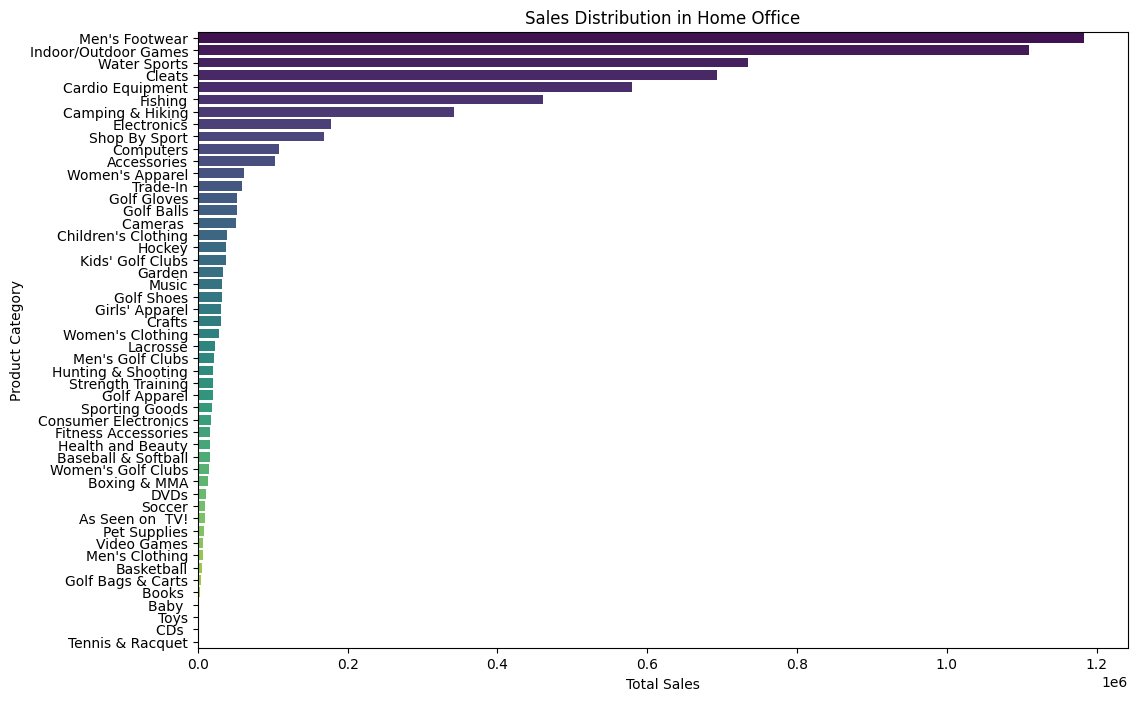

In [ ]:
home_df['Category_Name'] = home_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)
product_sales_home = home_df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)



plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales_home.values, y=product_sales_home.index, palette='viridis')
plt.title('Sales Distribution in Home Office')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/3902275271.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales_2.values, y=product_sales_2.index, palette='viridis')


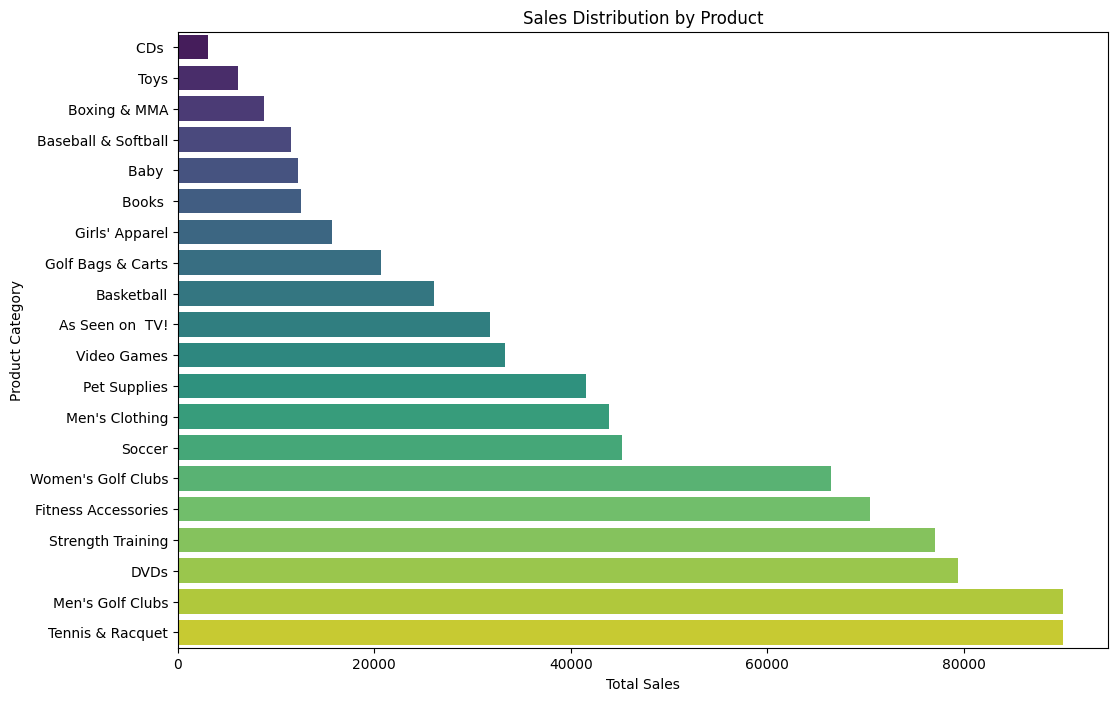

In [ ]:
grouped_df['Category_Name'] = grouped_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)
product_sales_2 = grouped_df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=True)


threshold_2 = 100000 
small_values_2 = product_sales_2[product_sales_2 > threshold_2]
product_sales_2 = product_sales_2[product_sales_2 <= threshold_2]
product_sales_2['Other'] = small_values_2.sum()
product_sales_2 = product_sales_2[product_sales_2.index != 'Other']

plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales_2.values, y=product_sales_2.index, palette='viridis')
plt.title('Sales Distribution by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_31791/1664232222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_segment_distribution.index, y=customer_segment_distribution.values, palette='viridis')


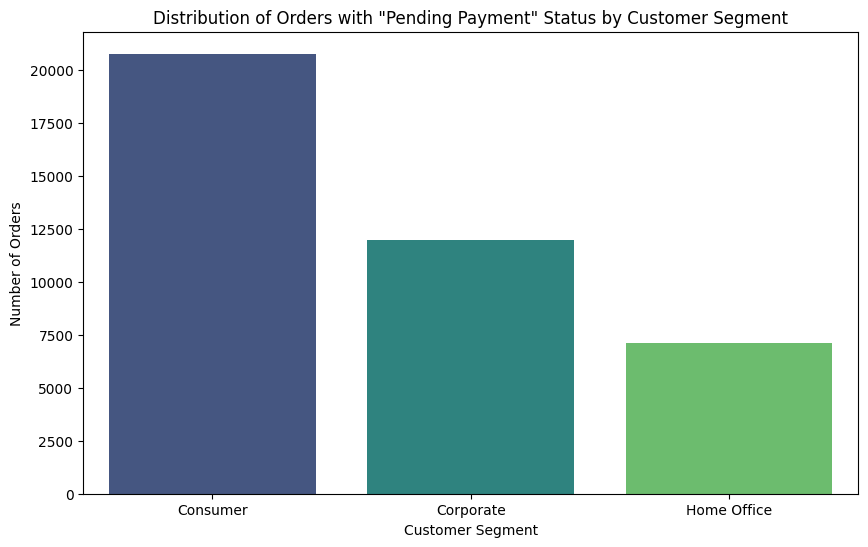

In [ ]:
pending_payment_data = df[df['Order_Status'] == 'PENDING_PAYMENT']

# Analyze the distribution across customer segments
customer_segment_distribution = pending_payment_data['Customer_Segment'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_distribution.index, y=customer_segment_distribution.values, palette='viridis')
plt.title('Distribution of Orders with "Pending Payment" Status by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
df3 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderID.csv")

aggregate3 = {
    #'Category_Name': list,
    'Sales': 'last',
    'Order_Id': 'last',
    'Order_Profit_Per_Order': 'last',
    'Customer_Segment': 'last',
    'OrderDate':'last',
    


}

df_3 = df3.groupby('column1').agg(aggregate3).reset_index()

df3.head()

,OrderType,Customer_Segment,Order_Country,OrderDate,Sales,Order_Profit_Per_Order,column1,Market,Order_Item_Product_Price,Order_Id
0,DEBIT,Consumer,Francia,2015-08-02 06:53:00.0000000,299.980011,103.940002,1621,Europe,299.980011,14612
1,TRANSFER,Consumer,Alemania,2015-06-12 02:55:00.0000000,159.960007,51.400002,1657,Europe,39.990002,11107
2,PAYMENT,Home Office,Francia,2015-07-02 19:42:00.0000000,65.970001,7.760000,73,Europe,21.990000,12525
3,CASH,Corporate,México,2017-05-09 09:08:00.0000000,129.990005,53.230000,8136,LATAM,129.990005,58872
4,TRANSFER,Consumer,Rumania,2016-11-12 08:40:00.0000000,99.959999,37.580002,1688,Europe,24.990000,46677


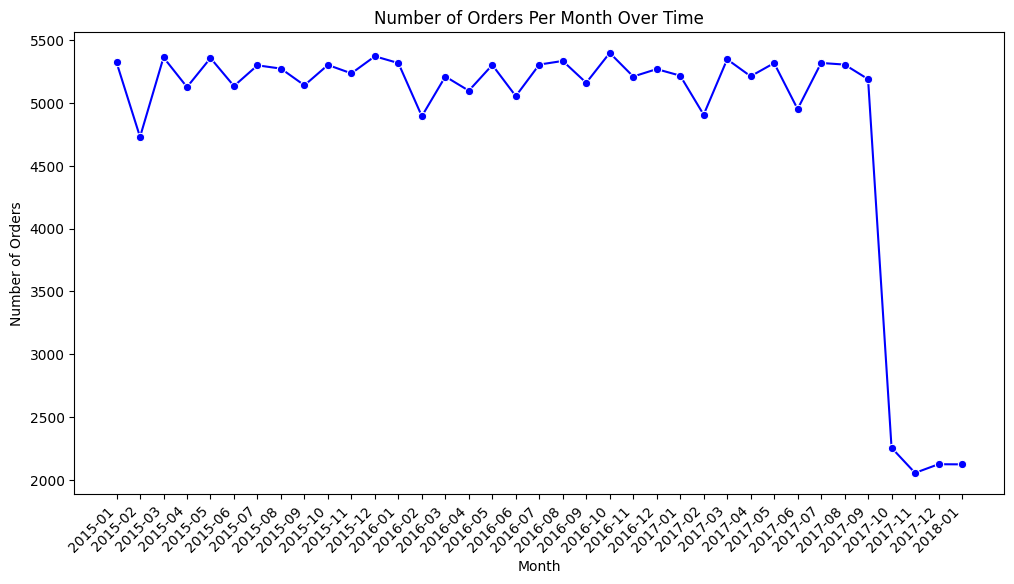

In [ ]:
df3['OrderDate'] = pd.to_datetime(df3['OrderDate'])

# Extract month and year and create new columns
df3['OrderMonth'] = df3['OrderDate'].dt.to_period('M')

# Calculate the number of orders per month
orders_per_month = df3['OrderMonth'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values, marker='o', color='blue')
plt.title('Number of Orders Per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

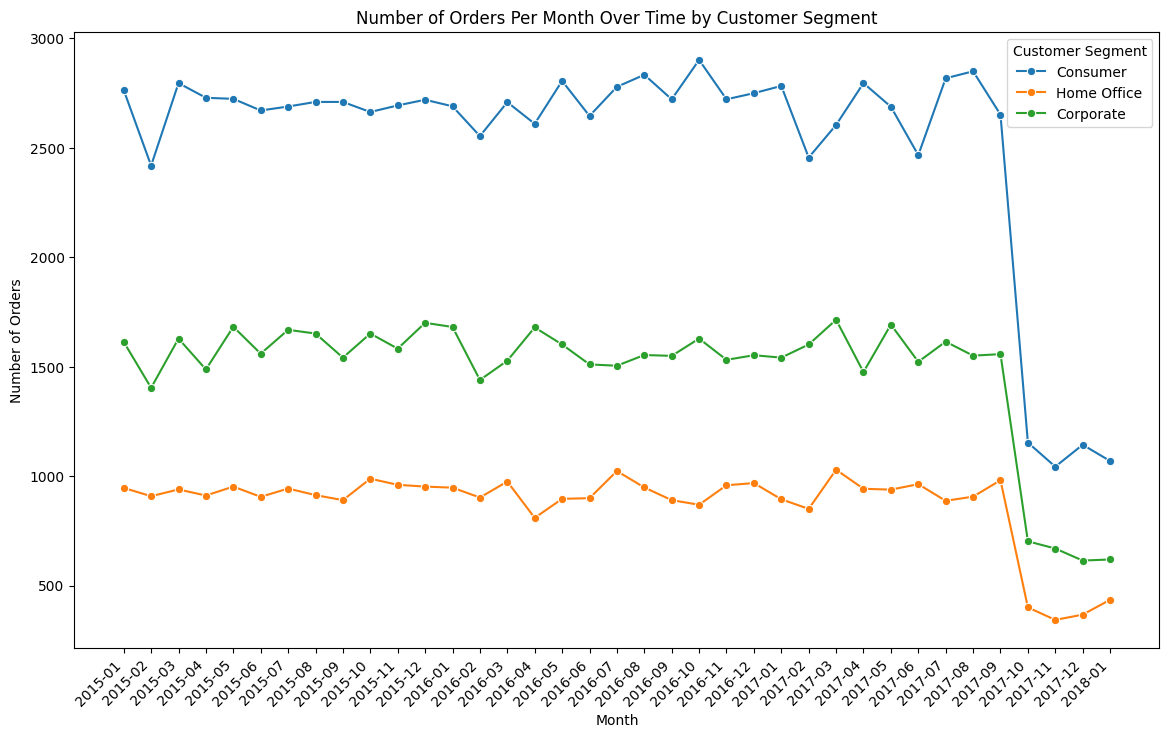

In [ ]:
df3['OrderDate'] = pd.to_datetime(df3['OrderDate'])

# Extract month and year and create new columns
df3['OrderMonth'] = df3['OrderDate'].dt.to_period('M')

# Plotting
plt.figure(figsize=(14, 8))

# Iterate over each customer segment
for segment in df3['Customer_Segment'].unique():
    segment_data = df3[df3['Customer_Segment'] == segment]
    orders_per_month = segment_data['OrderMonth'].value_counts().sort_index()
    
    sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values, marker='o', label=segment)

plt.title('Number of Orders Per Month Over Time by Customer Segment')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Segment')
plt.show()